In [98]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

%run '../functions.py'
%run '../classes.py'
model_w2v_settings = return_best_model()
import copy as cp
model_w2v_settings = cp.deepcopy(model_w2v_settings)
model_w2v_settings['model_path'] = "../all_datasets/" + model_w2v_settings['model_path']

model_w2v = Word2VecModel(model_w2v_settings)

# read preprocessed data from pickle file
df = pd.read_pickle('data/preprocessed_titles_labels.pkl')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adammajczyk/nltk_data..

,title,is_clickbait,text,dataset,sample
0,"[seventeen, time, game, throne, matched, perfe...",1,NaN,clickbait-dataset,train
1,"[facing, texas, tar, heel, territory, duke, fi...",0,NaN,clickbait-dataset,train
4,"[wikinews, interview, kevin, baugh, president,...",0,NaN,clickbait-dataset,train
6,"[identify, justin, bieber, music, video, youtu...",1,NaN,clickbait-dataset,train
9,"[uganda, introduces, antihomosexual, legislation]",0,NaN,clickbait-dataset,train


In [100]:
# split data into train and test stratified by y
import os
import pickle

df['title_vector'] = [get_word_vectors(model_w2v, title, aggregation='mean') for title in df['title']]

X_train = np.vstack(df[df['sample']=='train']['title_vector'])
X_test = np.vstack(df[df['sample']=='val2']['title_vector'])



y_train = df[df['sample']=='train']['is_clickbait']
y_test = df[df['sample']=='val2']['is_clickbait']


# read scaler from file
with open('predictive_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'dim_{i}' for i in range(X_train_scaled.shape[1])])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f'dim_{i}' for i in range(X_test_scaled.shape[1])])

In [102]:
X_train_scaled_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-1.713662,0.258062,2.427986,0.046448,-0.849953,0.665439,1.289721,-0.540935,-1.481057,0.963415,-1.084166,-0.573679,0.873325,-0.484511,-0.090599,1.273624,0.355333,-0.023705,1.651418,-0.629018
1,0.637541,0.668880,-0.658359,-1.132970,-0.498207,-0.373785,-1.374757,0.512834,-0.390618,-1.585143,0.258145,0.732579,-0.761913,-0.363532,-0.491472,-0.277812,-0.404099,-0.635882,0.350133,-0.055012
2,0.908334,-0.815256,-0.281644,0.065138,0.943054,-1.305884,-0.457578,0.786838,-3.886728,1.224912,2.835618,1.028881,2.742439,-0.079101,1.211509,-1.356984,-2.268876,-0.283292,1.775027,-0.043970
3,-0.990751,-0.215094,0.576585,0.448770,1.595453,0.314784,-0.904570,-1.574369,0.084271,-0.969253,1.559205,-1.592279,-0.279788,-0.791212,-0.021196,0.634255,-0.435700,-0.457074,1.228869,-0.053851
4,1.310696,-0.047530,-0.030171,0.386449,-1.037755,-0.836564,-2.796672,1.398252,-1.524883,-0.948190,1.072540,1.176998,1.041620,-2.376887,2.178624,-3.055079,-2.039249,-1.801435,-1.388543,-0.123845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,-1.109352,-1.174512,0.763858,0.019436,-0.190491,0.103118,0.296766,-0.015262,-1.641639,0.490457,-1.067443,-0.970948,-0.547899,0.736452,1.061581,-1.415072,0.055330,-0.333828,1.477201,0.395734
28832,-0.133657,0.214262,-1.531798,-0.129812,0.316494,-1.518387,-0.322774,0.560954,0.755014,-0.218250,-0.918899,0.287039,-0.924801,-2.342900,-2.030723,-0.837992,0.499538,-0.991270,-0.103976,-1.284635
28833,0.277301,-2.342008,0.080490,-0.564498,0.770241,-1.914845,-1.493512,1.466650,-0.856808,1.555783,1.044901,0.743562,-0.525696,-1.446093,-3.113614,-1.619293,-0.143841,-0.405465,0.545564,-1.036172
28834,0.374273,0.045805,0.739495,-1.205241,-0.382935,1.317126,-0.264060,-0.924610,-0.216986,-1.100888,-0.749396,-0.679773,0.199591,-0.314387,-1.205198,0.215879,0.676538,-1.090697,-0.467100,0.345071


In [103]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

def return_model_with_param(model_name, param = dict()):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier(**param)
    elif model_name == 'random_forest':
        model = RandomForestClassifier(**param)
    elif model_name == 'xgboost':
        model = XGBClassifier(**param)
    elif model_name == 'lightgbm':
        model = LGBMClassifier(**param, verbose=-1)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**param, verbose=0)
    return model

In [104]:
# train LightGBM model for each dimension


from sklearn.metrics import roc_auc_score, f1_score
from tqdm.notebook import tqdm



result_dict = {}
model_names = ['lightgbm', 'decision_tree',   'xgboost', 'random_forest','catboost',]
for name in model_names:
    result_dict[name] = dict()

models = dict()
for name in model_names:
    models[name] = cp.deepcopy(0)
models['lightgbm'] = 1

for name in tqdm(model_names):
    # for dim in tqdm(X_train_scaled_df.columns):
    #     model = return_model_with_param(name)
    #     model.fit(X_train_scaled_df[dim].values.reshape(-1,1), y_train)

    #     # calculate auc, f1
    #     y_pred_proba = model.predict_proba(X_test_scaled_df[dim].values.reshape(-1,1))[:, 1]
    #     auc = roc_auc_score(y_test, y_pred_proba)

    #     y_pred = model.predict(X_test_scaled_df[dim].values.reshape(-1,1))
    #     f1 = f1_score(y_test, y_pred)
    #     result_dict[name][dim] = {'auc': auc, 'f1': f1}
    model = return_model_with_param(name)

    model.fit(X_train_scaled_df, y_train)
    result_dict[name]['feature_importance'] = model.feature_importances_

    models[name] = cp.deepcopy(model)
result_df = pd.DataFrame(result_dict).T






  0%|          | 0/5 [00:00<?, ?it/s]

In [105]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2b2e0b350>}

In [106]:
result_df['feature_importance_mean'] = result_df['feature_importance'].apply(lambda x: np.mean(x))
result_df['feature_importance_std'] = result_df['feature_importance'].apply(lambda x: np.std(x))

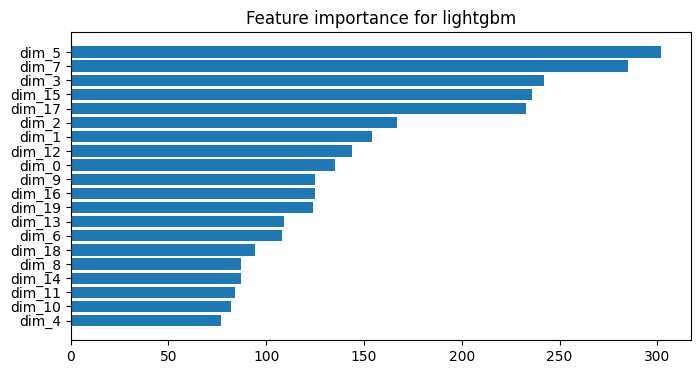

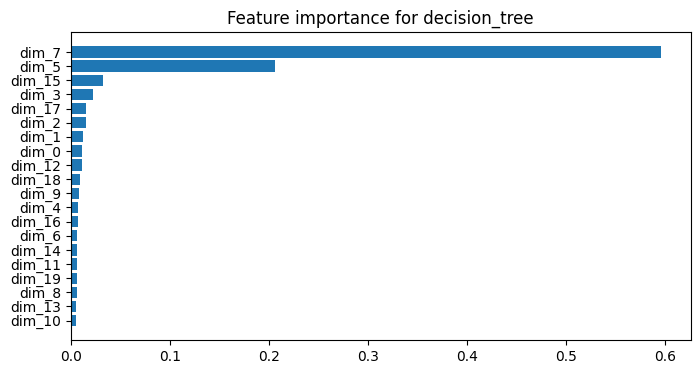

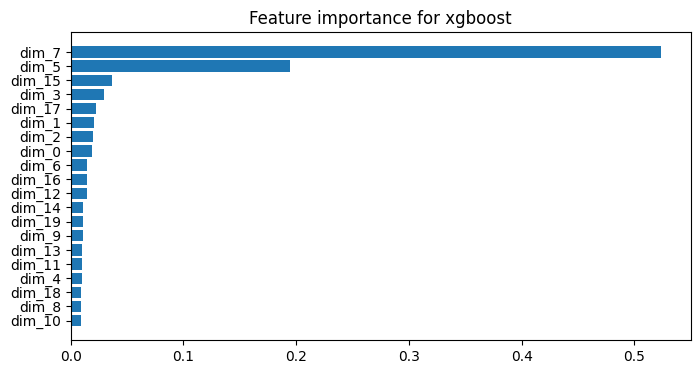

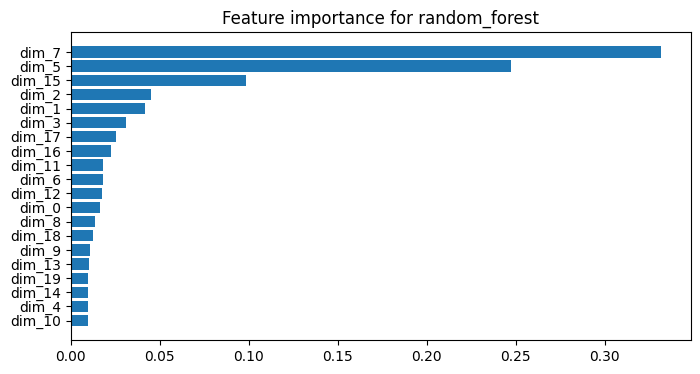

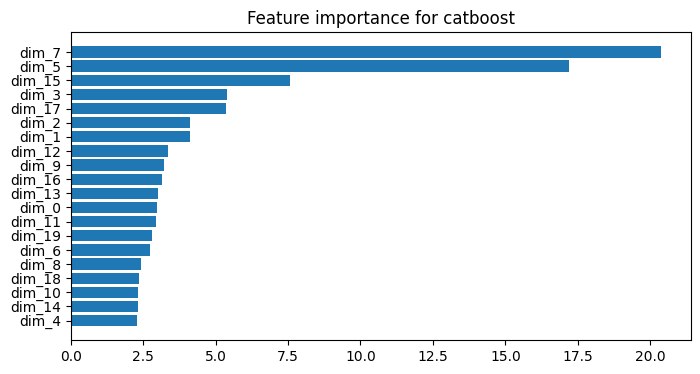

In [107]:
import matplotlib.pyplot as plt
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    
    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importance)
    plt.title(f'Feature importance for {name}')


In [108]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2b2e0b350>}

In [109]:
# get 10 worst performing dimensions for each model based on feature importance
import dalex as dx
worst_performing_dimensions = dict()
for name in model_names:
    worst_performing_dimensions[name] = None
for name in model_names:
    explainer = dx.Explainer(models[name], X_train_scaled_df, y_train, verbose=False)
    feature_importance = explainer.model_parts(random_state=42).result
    # print(feature_importance)
    full_model = feature_importance[feature_importance['variable'] == '_full_model_']['dropout_loss'].values[0]
    feature_importance = feature_importance[feature_importance['variable'].str.contains('dim')]
    diff = feature_importance['dropout_loss'] - full_model
    feature_importance['diff'] = diff
    feature_importance = feature_importance.sort_values(by='diff', ascending=False)
    # print(feature_importance)
    # get dimensions with diff lower than 25% of best performing dimension
    best_performing_dimension_top5percent = feature_importance['diff'].values[:int(len(feature_importance)*0.05)]
    # print(feature_importance)
    # print(best_performing_dimension_top5percent)
    # break
    best_performing_dimension = np.mean(best_performing_dimension_top5percent)
    # print(best_performing_dimension)
    feature_importance = feature_importance[feature_importance['diff'] < best_performing_dimension/4]
    dropped_dimensions = feature_importance['variable'].values
    worst_performing_dimensions[name] = dropped_dimensions

    
    print(f'Worst performing dimensions for {name}:')
    print(dropped_dimensions, len(dropped_dimensions))

    
worst_performing_dimensions

Worst performing dimensions for lightgbm:
['dim_15' 'dim_17' 'dim_3' 'dim_2' 'dim_0' 'dim_12' 'dim_19' 'dim_1'
 'dim_16' 'dim_6' 'dim_9' 'dim_18' 'dim_13' 'dim_11' 'dim_4' 'dim_14'
 'dim_10' 'dim_8'] 18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Worst performing dimensions for decision_tree:
['dim_15' 'dim_3' 'dim_17' 'dim_2' 'dim_1' 'dim_0' 'dim_12' 'dim_16'
 'dim_18' 'dim_14' 'dim_6' 'dim_4' 'dim_19' 'dim_8' 'dim_9' 'dim_11'
 'dim_13' 'dim_10'] 18
Worst performing dimensions for xgboost:
['dim_15' 'dim_17' 'dim_3' 'dim_2' 'dim_1' 'dim_0' 'dim_12' 'dim_19'
 'dim_16' 'dim_11' 'dim_6' 'dim_8' 'dim_9' 'dim_13' 'dim_10' 'dim_18'
 'dim_14' 'dim_4'] 18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Worst performing dimensions for random_forest:
['dim_15' 'dim_3' 'dim_2' 'dim_1' 'dim_17' 'dim_16' 'dim_12' 'dim_0'
 'dim_6' 'dim_11' 'dim_9' 'dim_14' 'dim_13' 'dim_8' 'dim_18' 'dim_19'
 'dim_4' 'dim_10'] 18
Worst performing dimensions for catboost:
['dim_15' 'dim_3' 'dim_17' 'dim_2' 'dim_1' 'dim_12' 'dim_9' 'dim_19'
 'dim_0' 'dim_16' 'dim_11' 'dim_13' 'dim_6' 'dim_4' 'dim_10' 'dim_8'
 'dim_18' 'dim_14'] 18


{'lightgbm': array(['dim_15', 'dim_17', 'dim_3', 'dim_2', 'dim_0', 'dim_12', 'dim_19',
        'dim_1', 'dim_16', 'dim_6', 'dim_9', 'dim_18', 'dim_13', 'dim_11',
        'dim_4', 'dim_14', 'dim_10', 'dim_8'], dtype=object),
 'decision_tree': array(['dim_15', 'dim_3', 'dim_17', 'dim_2', 'dim_1', 'dim_0', 'dim_12',
        'dim_16', 'dim_18', 'dim_14', 'dim_6', 'dim_4', 'dim_19', 'dim_8',
        'dim_9', 'dim_11', 'dim_13', 'dim_10'], dtype=object),
 'xgboost': array(['dim_15', 'dim_17', 'dim_3', 'dim_2', 'dim_1', 'dim_0', 'dim_12',
        'dim_19', 'dim_16', 'dim_11', 'dim_6', 'dim_8', 'dim_9', 'dim_13',
        'dim_10', 'dim_18', 'dim_14', 'dim_4'], dtype=object),
 'random_forest': array(['dim_15', 'dim_3', 'dim_2', 'dim_1', 'dim_17', 'dim_16', 'dim_12',
        'dim_0', 'dim_6', 'dim_11', 'dim_9', 'dim_14', 'dim_13', 'dim_8',
        'dim_18', 'dim_19', 'dim_4', 'dim_10'], dtype=object),
 'catboost': array(['dim_15', 'dim_3', 'dim_17', 'dim_2', 'dim_1', 'dim_12', 'dim_9',
        '

In [110]:
# get intersection of worst performing dimensions
worst_performing_dimensions_intersection = set(worst_performing_dimensions['lightgbm']).intersection(set(worst_performing_dimensions['decision_tree']), set(worst_performing_dimensions['xgboost']), set(worst_performing_dimensions['random_forest']), set(worst_performing_dimensions['catboost']))
worst_performing_dimensions_intersection, len(worst_performing_dimensions_intersection)

({'dim_0',
  'dim_1',
  'dim_10',
  'dim_11',
  'dim_12',
  'dim_13',
  'dim_14',
  'dim_15',
  'dim_16',
  'dim_17',
  'dim_18',
  'dim_19',
  'dim_2',
  'dim_3',
  'dim_4',
  'dim_6',
  'dim_8',
  'dim_9'},
 18)

In [111]:
# save which dimensions to remove to file
with open('predictive_models/worst_performing_dimensions_intersection.pkl', 'wb') as f:
    pickle.dump(worst_performing_dimensions_intersection, f)

Text(0, 0.5, 'Prawdopodobieństwo [0, 1]')

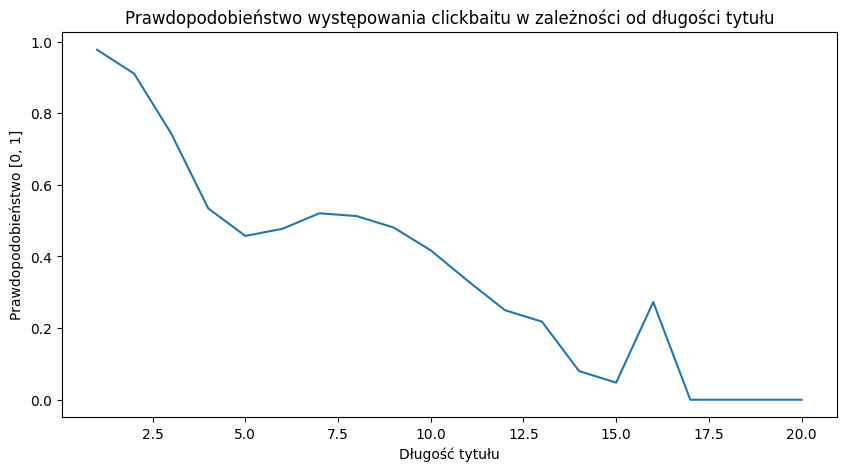

In [112]:
# do we want title length as a feature?
df['title_length'] = df['title'].apply(lambda x: len(x))

df.groupby('title_length')['is_clickbait'].mean().plot( figsize=(10, 5))
plt.title('Prawdopodobieństwo występowania clickbaitu w zależności od długości tytułu')
plt.xlabel('Długość tytułu')
plt.ylabel('Prawdopodobieństwo [0, 1]')